# **WEB SCRAPING**

In [8]:
import csv
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [9]:
# Set the URL of the paginated webpage that you want to scrape
url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Initialize an empty list to store the data that you scrape
data = []

# Setting the initial page number and the increment that you want to use to paginate through the webpage
page_num = 1
page_incr = 1
page_size = 100
# maximum number of pages to be scraped
max_pages = 20

# Set the URL of the webpage to be scraped
paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

# A while loop to paginate through the webpage and scrape the data
while page_num <= max_pages:

    print(f"Scraping page {page_num}")

    # A GET request to the paginated URL
    response = requests.get(paginated_url)

    # Parsing the response using BeautifulSoup
    parsed_content = BeautifulSoup(response.text, "html.parser")

    # Finding all the elements on the page that contain the data to be scraped
    elements = parsed_content.find_all("div",class_ = "body")

    # Looping through the elements and extract the data that you want to scrape
    for element in elements:
        header = element.find("h2",class_ = "text_header").text.replace("\n", " ")
        sub_header = element.find("h3",class_ = "text_sub_header").text.replace("\n", " ")
        content = element.find("div",class_ = "text_content").text.replace("\n", " ")

        data.append([header,sub_header,content])

    # Increasing the page number and setting the paginated URL to the new page
    page_num += page_incr
    paginated_url = f"{url}/page/{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"

    print(f"   ---> {len(data)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [10]:
#Coverting the list data into a dataframe
df = pd.DataFrame(data)
df.columns = ["REVIEW","PERSONAL INFO","CONTENT"]

#Removing unwanted text(first text preprocessing)
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
df

,REVIEW,PERSONAL INFO,CONTENT
0,"""cannot recommend BA""",J Fang (Canada) 23rd June 2024,While BA may have made some positive improveme...
1,“a very poor last impression of BA”,J Fang (Canada) 23rd June 2024,British Airways new Club Suite is a marked imp...
2,"""happy to recommend BA""",Caleb Lowe (United Kingdom) 18th June 2024,"Four very pleasant, on time flights with frien..."
3,"""cancelled our return flight""",N Thomas (United Kingdom) 18th June 2024,Not Verified | We travel extensively over 25...
4,"""Very good experience all round""",28 reviews N Carter (United Kingdom) 17th...,Flight delayed an hour due to bad weather arou...
...,...,...,...
1995,"""would I fly in BA First again? No""",1 reviews P Simpson (United Kingdom) 18th...,"✅ Verified Review | In September 2016, I flew ..."
1996,"""reduced to that of a budget airline""",Alan Whitlock (United Kingdom) 18th January ...,✅ Verified Review | St Petersburgh to London....
1997,"""a budget airline at premium airline prices""",H Anderson (China) 18th January 2017,✅ Verified Review | British Airways is a budg...
1998,"""incompetence and insincerity""",Y Li (China) 17th January 2017,✅ Verified Review | Shanghai to Zurich via Lo...


In [11]:
#Saving data into a csv
df.to_csv(r"C:\Users\Anna Rai\Desktop\BA_reviews.csv")

In [12]:
sentiment_analysis_df = df.drop(["REVIEW","PERSONAL INFO"], axis=1)
sentiment_analysis_df.replace(re.compile(r'\s*✅ Verified Review \|\s*'), '', inplace=True)
sentiment_analysis_df

,CONTENT
0,While BA may have made some positive improveme...
1,British Airways new Club Suite is a marked imp...
2,"Four very pleasant, on time flights with frien..."
3,Not Verified | We travel extensively over 25...
4,Flight delayed an hour due to bad weather arou...
...,...
1995,"In September 2016, I flew with British Airways..."
1996,St Petersburgh to London. I don’t know where B...
1997,British Airways is a budget airline at premium...
1998,"Shanghai to Zurich via London return, and Brit..."


In [13]:
# Save the DataFrame to a CSV file
sentiment_analysis_df.to_csv("sentiment_content.csv", index=False)

# **INSIGHTS**

In [14]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,SENTIMENT
0,While BA may have made some positive improveme...,0.5332
1,British Airways new Club Suite is a marked imp...,0.4727
2,"Four very pleasant, on time flights with frien...",0.6801
3,Not Verified | We travel extensively over 25...,-0.9389
4,Flight delayed an hour due to bad weather arou...,0.9620
...,...,...
1995,"In September 2016, I flew with British Airways...",-0.9813
1996,St Petersburgh to London. I don’t know where B...,0.9682
1997,British Airways is a budget airline at premium...,0.6249
1998,"Shanghai to Zurich via London return, and Brit...",-0.9211


In [18]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,SENTIMENT,SENTIMENT_TYPE
0,While BA may have made some positive improveme...,0.5332,positive
1,British Airways new Club Suite is a marked imp...,0.4727,positive
2,"Four very pleasant, on time flights with frien...",0.6801,positive
3,Not Verified | We travel extensively over 25...,-0.9389,negative
4,Flight delayed an hour due to bad weather arou...,0.9620,positive
...,...,...,...
1995,"In September 2016, I flew with British Airways...",-0.9813,negative
1996,St Petersburgh to London. I don’t know where B...,0.9682,positive
1997,British Airways is a budget airline at premium...,0.6249,positive
1998,"Shanghai to Zurich via London return, and Brit...",-0.9211,negative


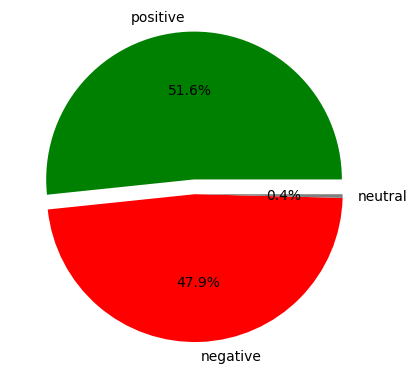

In [19]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()

# **Sentiment**

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

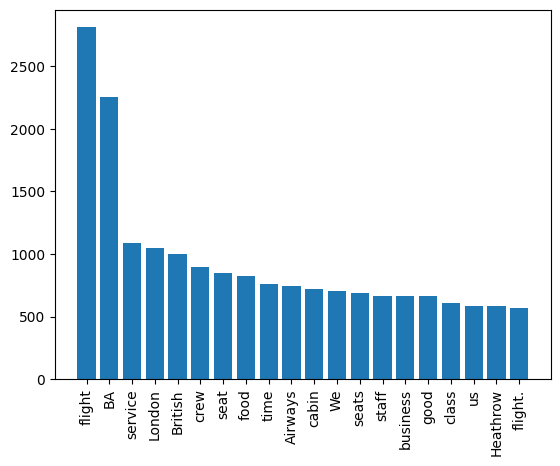

In [22]:
# The frequency chart shows the key topics within the
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

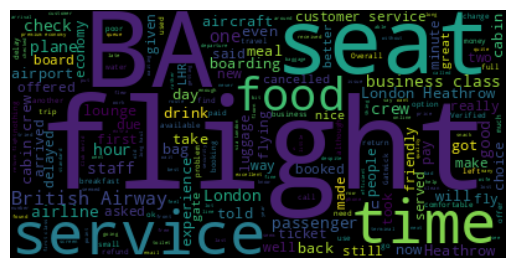

In [23]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()